**EE21RESCH01010 : ANNU
CONVEX LAB 8**

A company ’ XYZ ’ is constructing a road through a hilly area. The height
of the roadbed should be chosen in such a way that the total cost of construction
is minimized. The construction cost depends on the difference between height
of the roadbed and the current elevation of the road. hi gives the height of
the roadbed at a distance di meters down the road, where d > 0 is a given
discretization. The existing elevation at a point di meters down the road is
given by ei
.
The construction cost is mainly affected by the cuts(roadbed below existing
elevation) and fills(roadbed above existing elevation) present in the road. The
cut cost φ
cut and fill cost φ

f ill are the linear functions of the difference between
the existing elevation of the road and height of the roadbed. The overall cost
(C) is a linear combination of the cut cost and fill cost.


The goal is to minimize C subject to the following constraints.
* The maximum allowable road slope( first derivative) is D(1)
.
* The maximum allowable curvature(second derivative) is D(2)
.

* The maximum allowable third derivative is D(3)
.

Formulate the optimization problem and verify the convexity of cut and fill
functions by plotting for u in range (1:0.1:10). Find the optimal grading plan
for the problem with data given in the file data.m or data.py . Plot hi
,ei and

hi − ei for the optimal grading plan and report the associated cost.

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [53]:
def cost_array(u):
  uplus=cp.maximum(u,0)
  uminus=cp.maximum(-u,0)
  phi_fill=cp.square(uplus)*2+ uplus*30
  phi_cut=cp.square(uminus)*12+ uminus

  cost=phi_fill+phi_cut
  return cost

In [115]:
#Data given to us
n=100
x=np.linspace(1,101,100)
e=np.array([5*np.sin(i/(n*3*np.pi))+np.sin(i/(n*10*np.pi)) for i in x]) #1st expression as given in pdf is used
#e=np.array([5*np.sin((3*np.pi*i)/n)+np.sin((10*np.pi*i)/n) for i in x])
d=np.arange(1,101,1)

D=[0.08,0.025,0.005] #Constraints gradient vector

#Reshaping vectors
e=np.reshape(e,(n,1))
d=np.reshape(d,(n,1))

#CVXPY VARIABLE
h=cp.Variable((n,1))
u=h-e

#Constraints declaration
constraints=[]
#derivatives
G1=np.zeros((n,1))
G2=np.zeros((n,1))
G3=np.zeros((n,1))

for i in range(1,n):
  np.append(G1,(h[i]-h[i-1]))
for i in range(1,n-1):
  np.append(G2,(G1[i]-G1[i-1]))
for i in range(1,n-2):
  np.append(G3,(G2[i]-G2[i-1]))
for i in range(1,n-1):
  np.append(constraints,cp.abs(cp.max(G1[i]))<=D[0])
for i in range(1,n-2):
  np.append(constraints,cp.abs(cp.max(G2[i]))<=D[1])
for i in range(1,n-3):
  np.append(constraints,cp.abs(cp.max(G3[i]))<=D[2])


cost=cost_array(u)

obj=cp.Minimize(cp.sum(cost))

prob=cp.Problem(obj,constraints)
try:
   prob.solve()
except Exception as e:
  print(e)
print("optimal status:",prob.status)
print("our minimized cost:",prob.solve())
print("height values are",h.value)

optimal status: optimal
our minimized cost: 6.968214982988575e-06
height values are [[0.00562348]
 [0.01130375]
 [0.01698401]
 [0.02266425]
 [0.02834446]
 [0.03402464]
 [0.03970479]
 [0.0453849 ]
 [0.05106495]
 [0.05674495]
 [0.06242488]
 [0.06810475]
 [0.07378455]
 [0.07946426]
 [0.08514389]
 [0.09082342]
 [0.09650286]
 [0.10218219]
 [0.10786141]
 [0.11354051]
 [0.11921949]
 [0.12489834]
 [0.13057705]
 [0.13625562]
 [0.14193404]
 [0.14761231]
 [0.15329041]
 [0.15896835]
 [0.16464612]
 [0.17032371]
 [0.17600111]
 [0.18167832]
 [0.18735533]
 [0.19303213]
 [0.19870873]
 [0.20438511]
 [0.21006127]
 [0.2157372 ]
 [0.22141289]
 [0.22708834]
 [0.23276355]
 [0.2384385 ]
 [0.24411319]
 [0.24978762]
 [0.25546177]
 [0.26113565]
 [0.26680924]
 [0.27248254]
 [0.27815554]
 [0.28382824]
 [0.28950063]
 [0.29517271]
 [0.30084446]
 [0.30651589]
 [0.31218698]
 [0.31785773]
 [0.32352814]
 [0.32919819]
 [0.33486789]
 [0.34053722]
 [0.34620618]
 [0.35187476]
 [0.35754296]
 [0.36321077]
 [0.36887818]
 [0.37

Text(0.5, 1.0, 'height of Hill')

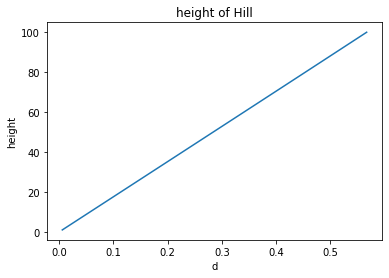

In [109]:
plt.plot(h.value,d)
plt.xlabel("d")
plt.ylabel("height")
plt.title("height of Hill")

Text(0.5, 1.0, 'u plot')

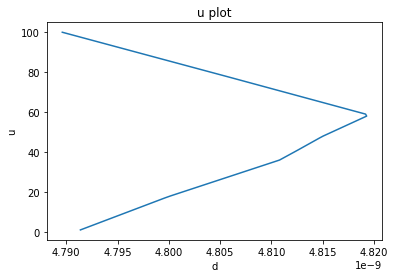

In [110]:
plt.plot((h.value-e),d) #u=h-e
plt.xlabel("d")
plt.ylabel("u")
plt.title("u plot")

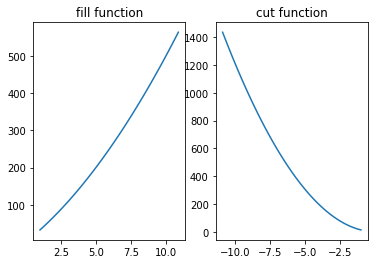

In [105]:
#fill and cut function function plot
U=np.arange(1,11,0.1)
Uplus=np.array([max(u,0) for u in U])
  
phi_fill=np.array([np.square(uplus)*2+ uplus*30 for uplus in Uplus])
phi_fill=np.reshape(phi_fill,(100,-1))
plt.subplot(1,2,1)
plt.plot(U,phi_fill)
plt.title("fill function")
U=np.arange(1,11,0.1)
Uminus=np.array([max((u),0) for u in U])
phi_cut=np.array([np.square(uminus)*12+ uminus for uminus in Uminus])
plt.subplot(1,2,2)
plt.title("cut function")
plt.plot((-U),phi_cut)

#CONVEXITY CAN BE SEEN FROM GRAPGH

Text(0.5, 1.0, 'Elevation of Hill')

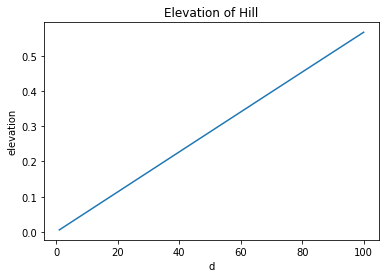

In [111]:
plt.plot(d,e)
plt.xlabel("d")
plt.ylabel("elevation")
plt.title("Elevation of Hill")

In [112]:
type(cost)

cvxpy.atoms.affine.add_expr.AddExpression

In [113]:
cost

Expression(CONVEX, NONNEGATIVE, (100, 1))

In [114]:
print(type(e))

<class 'numpy.ndarray'>
